# Exploring Google Project Sunroof Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#-- Importing the Dataset --#
df = pd.read_csv("/Users/michaelsegaline/Desktop/Solar Power Data Analysis/Google solar data/sunroof_solar_potential_by_censustract(Big Data No states).csv")

In [3]:
#-- Inspecting the raw data --#
df.head()

,carbon_offset_metric_tons,count_qualified,existing_installs_count,install_size_kw_buckets,kw_median,kw_total,lat_avg,lat_max,lat_min,lng_avg,...,region_name,state_name,yearly_sunlight_kwh_e,yearly_sunlight_kwh_f,yearly_sunlight_kwh_kw_threshold_avg,yearly_sunlight_kwh_median,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_total,yearly_sunlight_kwh_w
0,2159.887389,586,12,[[0171][5231][10114][1545][2016][252][352][451...,7.25,5219.00,34.267040,34.272362,34.261761,-118.432716,...,6037104401,California,1.014756e+06,2.539152e+06,1285.247909,10863.017950,1.075291e+06,1.760043e+06,7.922383e+06,1.533140e+06
1,11392.316227,369,4,[[060][550][1024][1518][2023][2515][3012][3515...,28.00,28391.25,43.156368,43.162289,43.150970,-77.607040,...,36055009400,New York,7.338827e+05,2.815855e+07,947.750000,30689.598633,1.739810e+05,1.342966e+06,3.117606e+07,7.666855e+05
2,6902.286133,788,3,[[0364][5313][1057][1513][207][258][305][351][...,5.25,7352.25,42.277794,42.288818,42.266918,-89.066589,...,17201000700,Illinois,1.024630e+06,2.850205e+06,980.050000,5823.500452,1.342642e+05,3.155397e+06,8.337565e+06,1.173068e+06
3,3238.933474,432,1,[[0320][567][1020][1512][251][302][351][401][4...,3.25,3598.25,40.422962,40.428940,40.418259,-79.993729,...,42003180300,Pennsylvania,1.203715e+06,1.432569e+06,948.600000,3724.817041,7.318190e+04,7.604248e+05,3.912445e+06,4.425539e+05
4,6111.873688,827,32,[[0125][5219][10227][15124][2039][2520][3015][...,11.50,15098.50,33.844044,33.847179,33.839771,-117.933113,...,6059086602,California,2.070519e+06,1.183461e+07,1260.550000,16996.447681,1.691435e+06,3.551939e+06,2.241812e+07,3.269615e+06


In [5]:
#-- Checking the dimensions of the dataset --#
df.shape

(48722, 31)

In [6]:
#-- Dropping unnessesary variables --#

columns_to_drop = ['lat_max','lat_min','lng_min','lng_max','yearly_sunlight_kwh_kw_threshold_avg','yearly_sunlight_kwh_n','yearly_sunlight_kwh_s','yearly_sunlight_kwh_e','yearly_sunlight_kwh_w','yearly_sunlight_kwh_f','count_qualified', 'percent_covered','percent_qualified','number_of_panels_n','number_of_panels_s','number_of_panels_e','number_of_panels_w','number_of_panels_f','number_of_panels_total','kw_median','yearly_sunlight_kwh_median','carbon_offset_metric_tons','region_name','install_size_kw_buckets']
df_cleaned_solar = df.drop(columns_to_drop, axis=1)

In [7]:
#-- Inspecting the Dataset --#
df_cleaned_solar.head()

,existing_installs_count,kw_total,lat_avg,lng_avg,number_of_panels_median,state_name,yearly_sunlight_kwh_total
0,12,5219.00,34.267040,-118.432716,29.0,California,7.922383e+06
1,4,28391.25,43.156368,-77.607040,112.0,New York,3.117606e+07
2,3,7352.25,42.277794,-89.066589,21.0,Illinois,8.337565e+06
3,1,3598.25,40.422962,-79.993729,13.0,Pennsylvania,3.912445e+06
4,32,15098.50,33.844044,-117.933113,46.0,California,2.241812e+07


In [8]:
#-- Dropping any missing or Null values --#
solar = df_cleaned_solar.dropna()

In [9]:
#-- Reinspecting the dataset --#
#-- 58 rows dropped; 0.0019% sparse--#
solar.shape

(48664, 7)

In [10]:
#-- Exploring Descriptive statistics of numerical variables --#
#-- The latititude and longitude average are indexing in Indiana --#

solar.describe()

,existing_installs_count,kw_total,lat_avg,lng_avg,number_of_panels_median,yearly_sunlight_kwh_total
count,48664.000000,48664.000000,48664.000000,48664.000000,48664.000000,4.866400e+04
mean,13.825292,17120.909466,37.450513,-92.992186,41.155947,2.234360e+07
std,36.814388,16630.081810,5.052329,17.096731,79.609332,2.262537e+07
min,0.000000,2.000000,19.560486,-158.124237,8.000000,2.178341e+03
25%,0.000000,6787.375000,33.838232,-106.330025,24.000000,8.361908e+06
50%,2.000000,13230.625000,38.441795,-87.683777,32.000000,1.686481e+07
75%,9.000000,22290.687500,41.187114,-80.179842,43.000000,2.916793e+07
max,847.000000,386462.500000,64.988930,-68.268173,4000.000000,5.339304e+08


# Univariate Exploration ( Exploring One Variable at a Time)

Inspecting the distrobution of kw_total

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kw_total', ylabel='Density'>

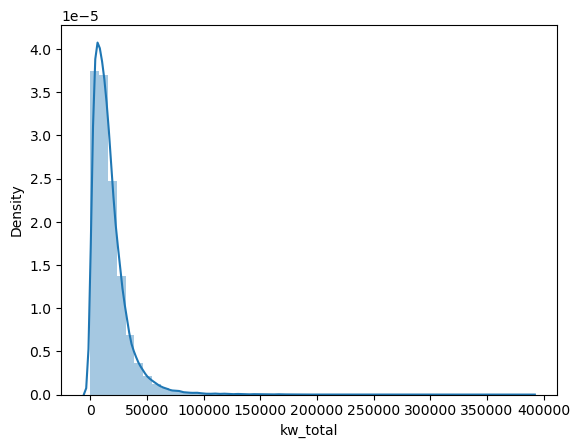

In [11]:
#-- The Distrobutions Appear to be 'left-skewed', not of a 'normal' or 'Bell shaped'  --#
kw = solar.kw_total
sns.distplot(kw)

Inspecting the distrobution of existing panels installed 

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='existing_installs_count', ylabel='Density'>

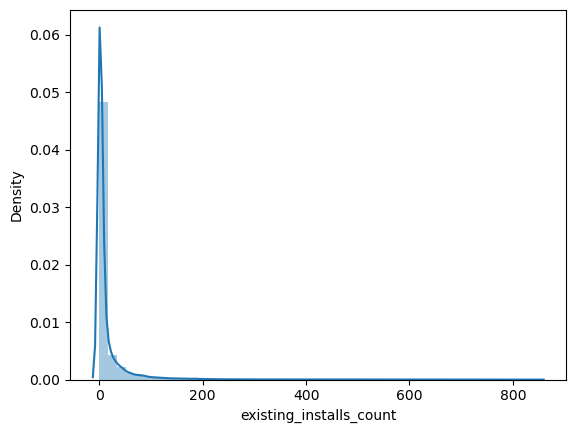

In [63]:
#-- Left Skewed Distrobution --#
installs = solar.existing_installs_count
sns.distplot(installs)

Now inspecting the distrobution of 'yearly sunlight'

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yearly_sunlight_kwh_total', ylabel='Density'>

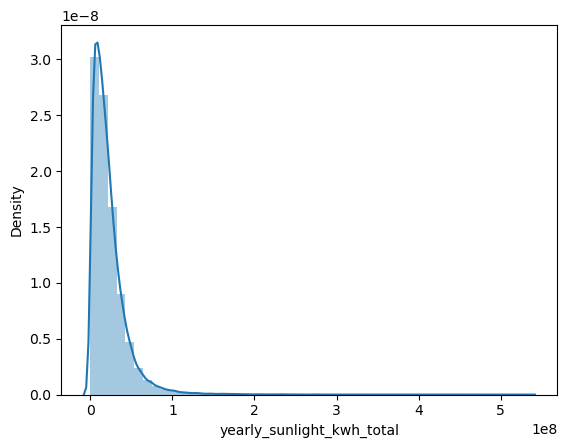

In [13]:
#-- Appears to be a left Skewed Distobution--# 
sun_power = solar.yearly_sunlight_kwh_total
sns.distplot(sun_power)

# It appears that on its surface, more pannels don't increase power output.  

<AxesSubplot:>

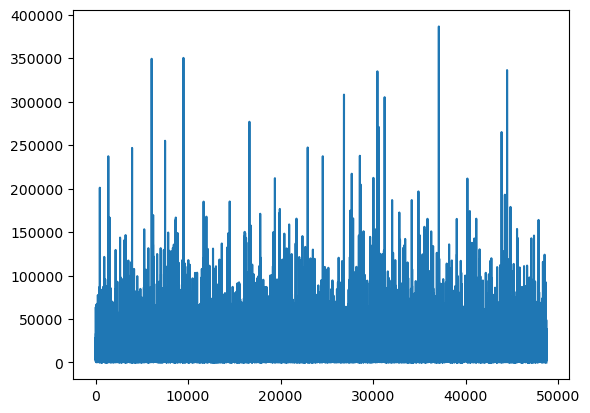

In [14]:
#-- Now plotting the frquency count of KW_total --#

solar.kw_total.plot()

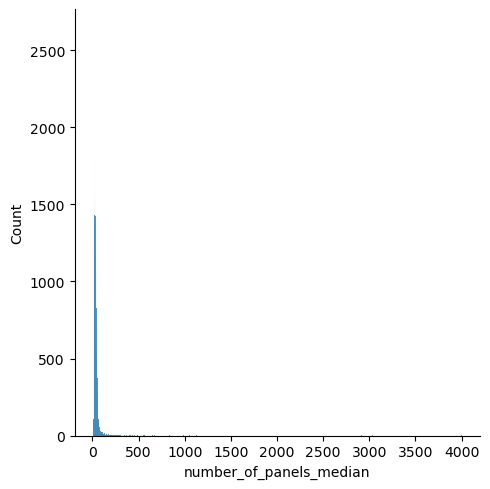

In [65]:
#-- The distrobution of pannels appears to be left-skewed as well --#
num_pan = solar.number_of_panels_median
sns.displot(num_pan)

<AxesSubplot:>

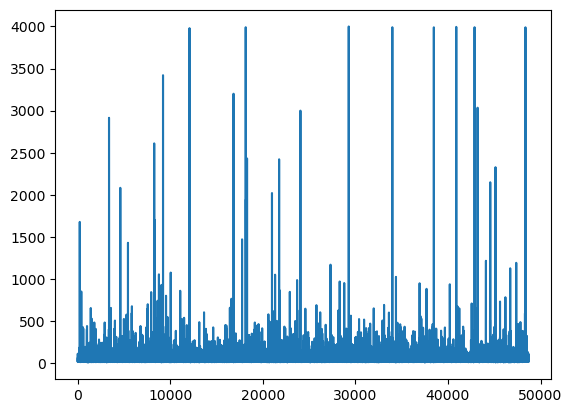

In [15]:
#-- Plotting the Frequency count of solar panels --#

solar.number_of_panels_median.plot()

# Now Exploring two Variables against Each other (Bivariate Exploration)

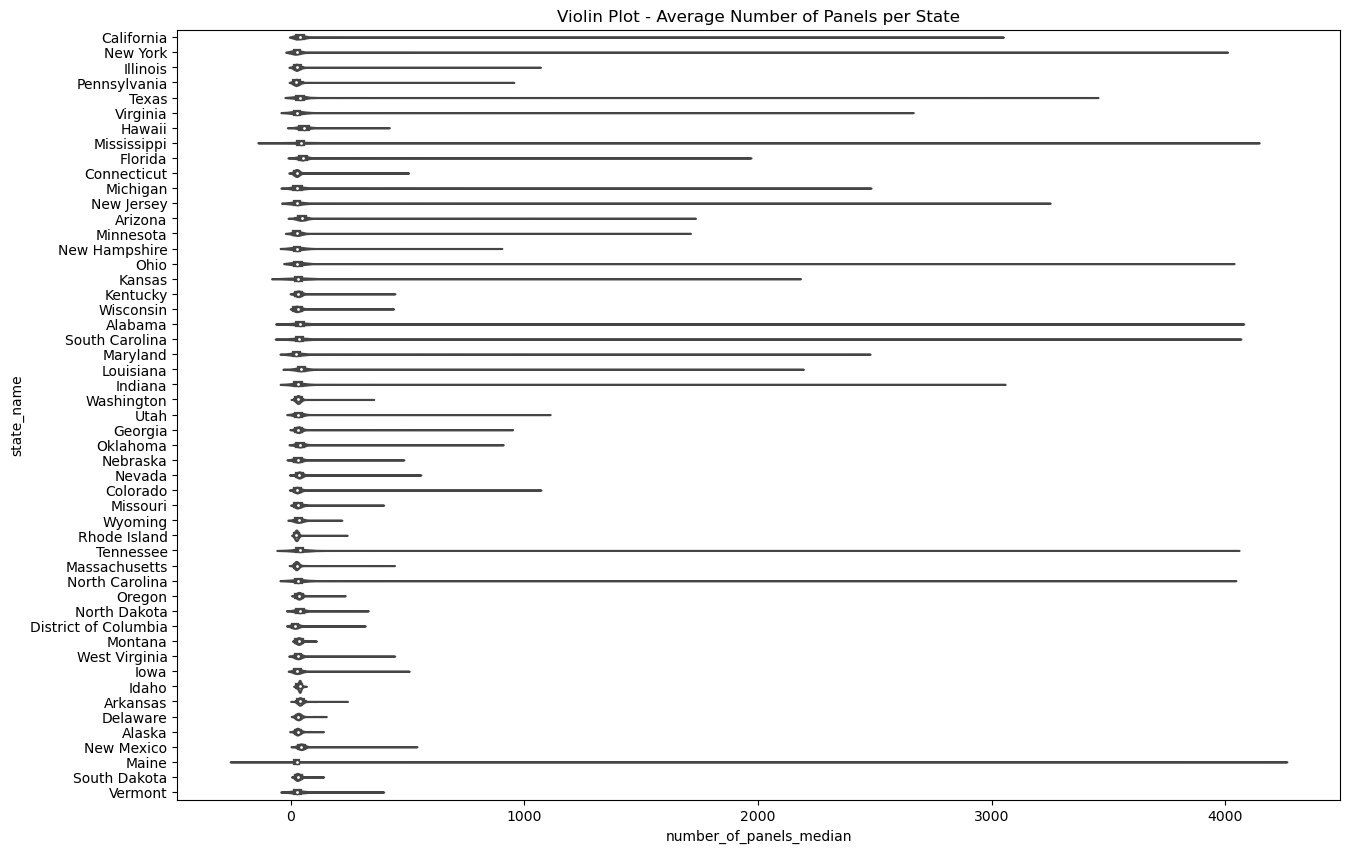

In [16]:
# Using violinplot
plt.figure(figsize=(15, 10))
sns.violinplot(x='number_of_panels_median', y='state_name', data=solar)
plt.title('Violin Plot - Average Number of Panels per State')
plt.show()

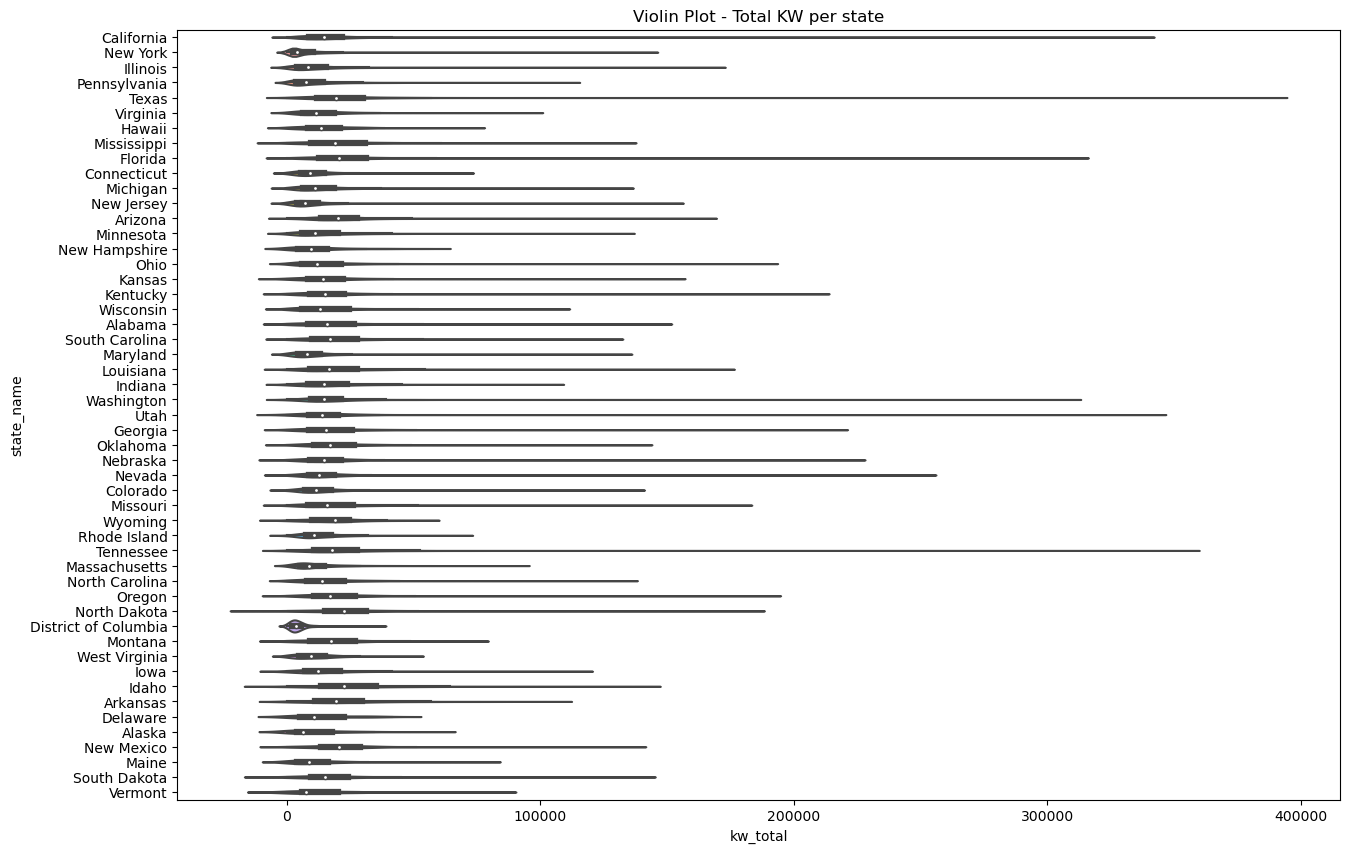

In [18]:
#-- Its Appears the state that produces the most KW is 'TEXAS' --#

plt.figure(figsize=(15, 10))
sns.violinplot(x='kw_total', y='state_name', data=solar)
plt.title('Violin Plot - Total KW per state')
plt.show()

# Plotting Latitude Against Longitute creates a density plot in the shape of the US. 

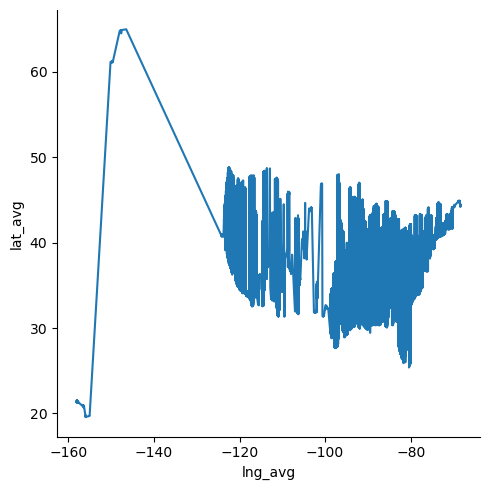

In [19]:
#-- When Plotting Lattitude against longitude, it make a map of the United States :) -- #
#-- You can see the density of where the most solar panels are --#

sns.relplot(data=solar, x="lng_avg", y="lat_avg", kind="line")

# Multivariate Analysis

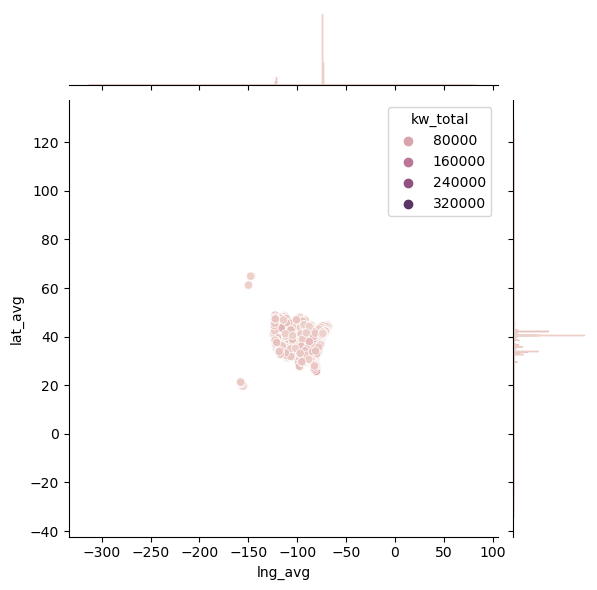

In [20]:
#-- Plotting 'KW_Total' against lat - long. The southern U.S. has the most sunlight --#  
sns.jointplot(data=solar, x="lng_avg", y="lat_avg", hue="kw_total")

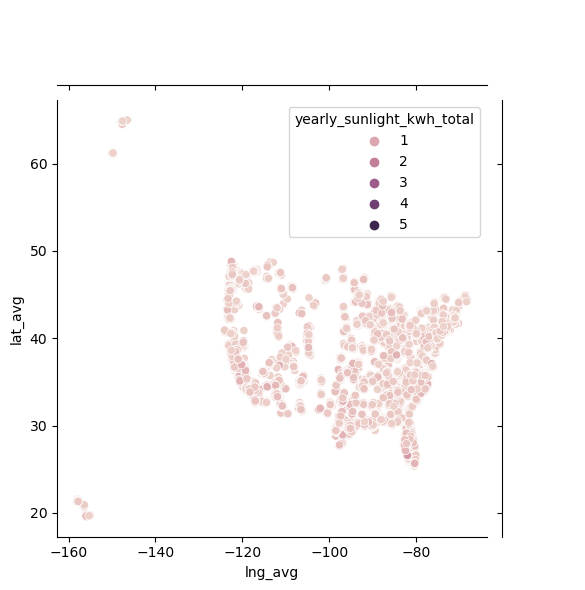

In [21]:
sns.jointplot(data=solar, x="lng_avg", y="lat_avg", hue="yearly_sunlight_kwh_total")

# When Plotting average number of panels against total produced KW, the graph indicates that more panels do not increase the amount of power produced. 

According to the graph, the magic number is 600, anymore depreciates energy.

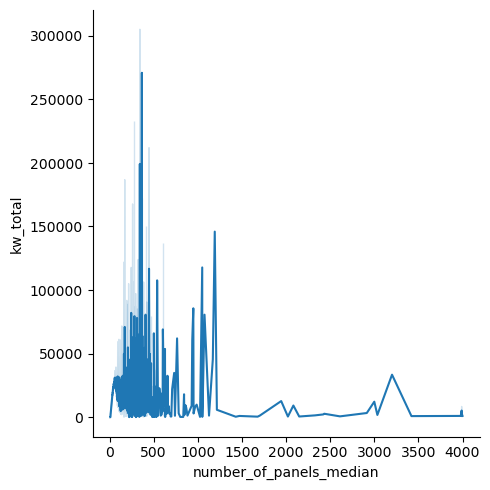

In [22]:
sns.relplot(data=solar, y="kw_total", x="number_of_panels_median", kind="line")

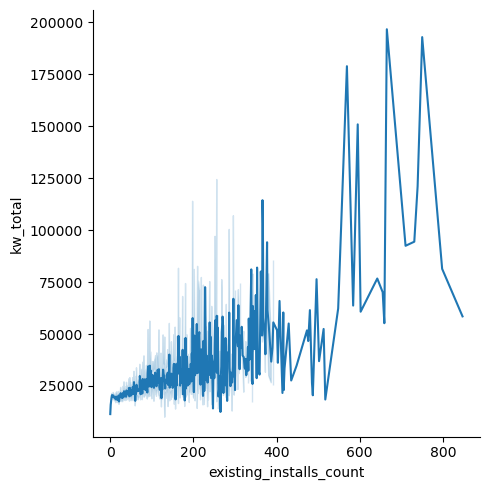

In [23]:
#-- When comparing existing pannels and kw production, there appears to be a tiered system. --# 

sns.relplot(data=solar, y="kw_total", x="existing_installs_count", kind="line")

There appears to be a strong positive correlation between yearly sunlight and total power produced. 

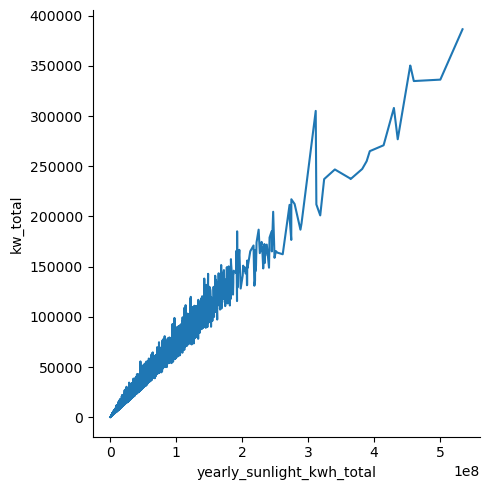

In [24]:
sns.relplot(data=solar, y="kw_total", x="yearly_sunlight_kwh_total", kind="line")

# Exploring Correlations between variables 

In [25]:
solar.head()

,existing_installs_count,kw_total,lat_avg,lng_avg,number_of_panels_median,state_name,yearly_sunlight_kwh_total
0,12,5219.00,34.267040,-118.432716,29.0,California,7.922383e+06
1,4,28391.25,43.156368,-77.607040,112.0,New York,3.117606e+07
2,3,7352.25,42.277794,-89.066589,21.0,Illinois,8.337565e+06
3,1,3598.25,40.422962,-79.993729,13.0,Pennsylvania,3.912445e+06
4,32,15098.50,33.844044,-117.933113,46.0,California,2.241812e+07


In [30]:
columns_to_drop = ['state_name']
solar_pca = solar.drop(columns_to_drop, axis=1)

In [31]:
#-- Separating the continuous variables and exploring for correlation. --#
str_list = [] #-- empty list to contain columns with strings (words)
for colname, colvalue in solar_pca.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)


In [32]:
#-- Get to the numeric columns by inversion--#            
num_list = solar_pca.columns.difference(str_list)  
solar_num = solar_pca[num_list]
solar_num.head()


,existing_installs_count,kw_total,lat_avg,lng_avg,number_of_panels_median,yearly_sunlight_kwh_total
0,12,5219.00,34.267040,-118.432716,29.0,7.922383e+06
1,4,28391.25,43.156368,-77.607040,112.0,3.117606e+07
2,3,7352.25,42.277794,-89.066589,21.0,8.337565e+06
3,1,3598.25,40.422962,-79.993729,13.0,3.912445e+06
4,32,15098.50,33.844044,-117.933113,46.0,2.241812e+07


# The variables of Yearly light and Solar Power production are so correlated that one variable must be dropped from the analysis do to multicolinarity

<AxesSubplot:title={'center':'Pearson Correlation of Customer Features'}>

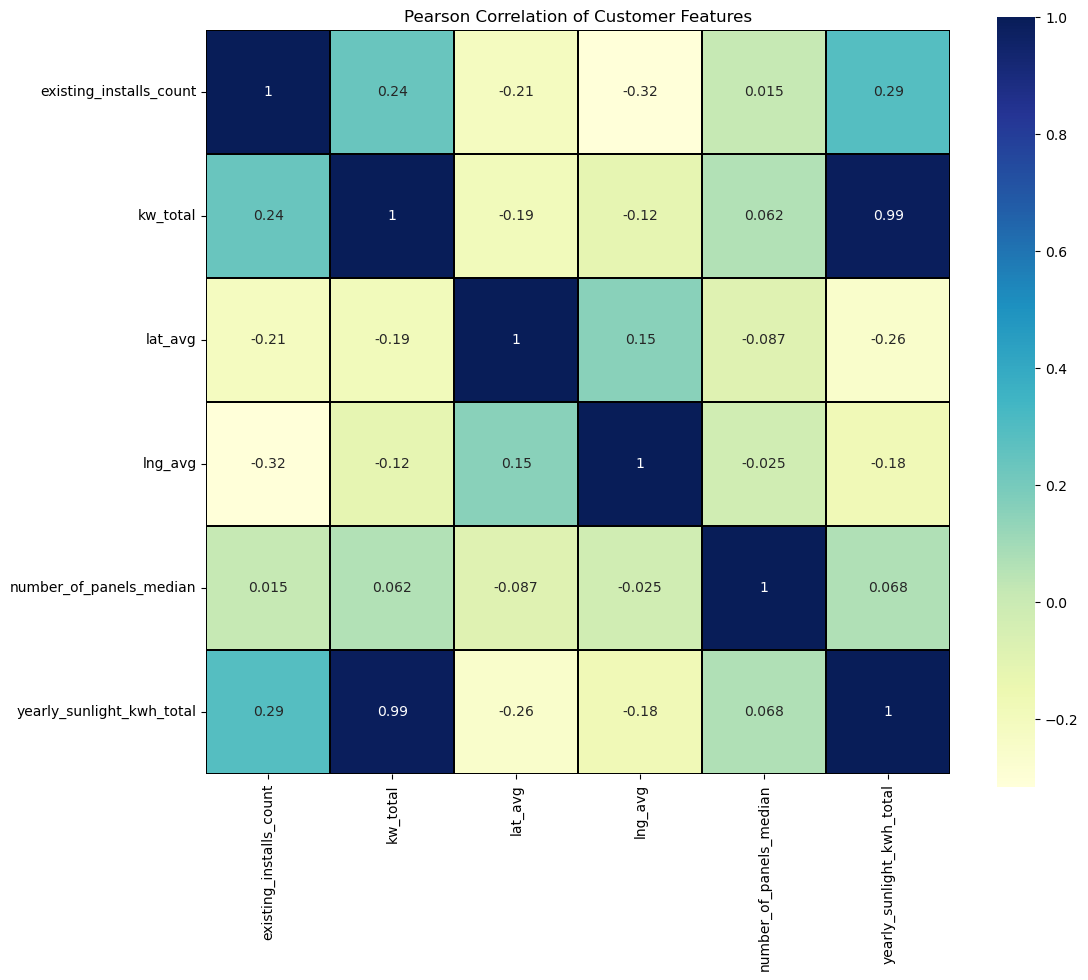

In [29]:
#-- Exploring for correlations between varaibles with matplotlib --#
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Customer Features')
 
# Draw the heatmap using seaborn
sns.heatmap(solar_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [34]:
#-- For some reason, I had to 're-drop' the same columns --#

#columns_to_drop = ['yearly_sunlight_kwh_total','region_name','state_name']
#solar_pca = solar.drop(columns_to_drop, axis=1)

# Now Conducting Prinicipal Component Analysis

In [35]:
#-- Import the class --#
from sklearn.preprocessing import(StandardScaler, LabelEncoder)

#-- Create the object --#

scaler = StandardScaler()

#-- Calculate the mean and Standard deviation --#
scaler.fit(solar_pca)

df_scaled = scaler.transform(solar_pca)



In [36]:
solar_pca = solar_pca.dropna()

In [37]:
#-- For some reason I have to re-drop the columns again --#
columns_to_drop = ['yearly_sunlight_kwh_total','state_name']
solar_pca = solar.drop(columns_to_drop, axis=1)

In [38]:
solar_pca.head()

,existing_installs_count,kw_total,lat_avg,lng_avg,number_of_panels_median
0,12,5219.00,34.267040,-118.432716,29.0
1,4,28391.25,43.156368,-77.607040,112.0
2,3,7352.25,42.277794,-89.066589,21.0
3,1,3598.25,40.422962,-79.993729,13.0
4,32,15098.50,33.844044,-117.933113,46.0


# Apply PCA to all components 

In [39]:
import sklearn
from sklearn.decomposition import PCA

pca_5 = PCA(n_components = 5, random_state = 2023)
pca_5.fit(solar_pca)
pc = pca_5.transform(solar_pca)
print(pc)

[[-1.19019084e+04 -8.49854300e+00  9.15818938e+00 -2.58334808e+01
  -3.05417066e+00]
 [ 1.12703520e+04  6.73973265e+01 -1.86681332e+01  1.41798011e+01
   5.87376838e+00]
 [-9.76867002e+03 -1.72947180e+01 -6.16158603e+00  1.72183328e+00
   3.98688055e+00]
 ...
 [ 4.41734337e+03 -7.34716802e+00  6.22578452e+00 -2.41213540e+01
  -2.63560090e+00]
 [ 8.89358429e+03 -1.58317860e+01 -5.61196829e+00  1.19947118e+01
  -3.33484397e+00]
 [-1.70953980e+04  6.58228021e+01 -7.90934792e+00  1.63849201e+01
   2.64461488e+00]]


Now creating a dataframe to explain the 5 features

In [40]:
pc_df = pd.DataFrame(pc, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'])
print(pc_df)

                PC1        PC2        PC3        PC4       PC5
0     -11901.908443  -8.498543   9.158189 -25.833481 -3.054171
1      11270.351989  67.397327 -18.668133  14.179801  5.873768
2      -9768.670022 -17.294718  -6.161586   1.721833  3.986881
3     -13522.673733 -24.207239  -7.628998  10.114992  1.638919
4      -2022.394819   5.571806  23.414091 -21.496834 -2.589594
...             ...        ...        ...        ...       ...
48659   -990.411763 -10.824578   1.510110  -4.005580 -4.250771
48660   1472.328356 -16.688841 -12.774395  16.741057  2.666522
48661   4417.343370  -7.347168   6.225785 -24.121354 -2.635601
48662   8893.584289 -15.831786  -5.611968  11.994712 -3.334844
48663 -17095.398024  65.822802  -7.909348  16.384920  2.644615

[48664 rows x 5 columns]


In [41]:
Load = pd.DataFrame(pca_5.components_.T,
                    columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],
                      index = solar_pca.columns)
Load

,PC1,PC2,PC3,PC4,PC5
existing_installs_count,0.000526,0.000409,0.984374,0.174922,0.020256
kw_total,1.000000,-0.000297,-0.000540,0.000029,0.000042
lat_avg,-0.000058,-0.004822,-0.024905,0.024433,0.999380
lng_avg,-0.000123,-0.004077,-0.174317,0.984271,-0.028428
number_of_panels_median,0.000296,0.999980,-0.001234,0.004060,0.004695


In [42]:
print("Variance explained by all the Principal components = ", sum(pca_5.explained_variance_ratio_ * 100))

Variance explained by all the Principal components =  100.0


In [43]:
pca_5.explained_variance_ratio_ * 100

array([9.99971418e+01, 2.28284303e-03, 4.74282158e-04, 9.26138807e-05,
       8.50430598e-06])

# Captured Variance per Principal Components for all 5 PCs¶

In [44]:
varex = pca_5.explained_variance_ratio_ * 100

var_df = pd.DataFrame(varex.round(2), columns = ['Captured Variance per PC'],
                      index = ['PC1', 'PC2', 'PC3','PC4','PC5'])
var_df

,Captured Variance per PC
PC1,100.0
PC2,0.0
PC3,0.0
PC4,0.0
PC5,0.0


# Scree Plot
The diagonal line representing the number of Principal Components on the 'X'axis and Explained Variance on 'Y'.

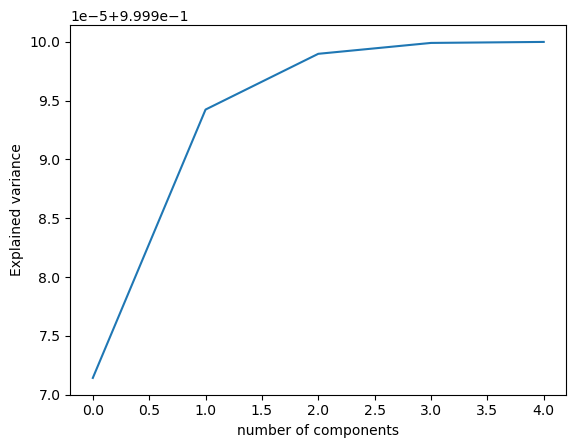

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca_5.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.savefig("elbow_plot.png", dpi =100)

In [46]:
#-- A heat map representing the variance per PC --#

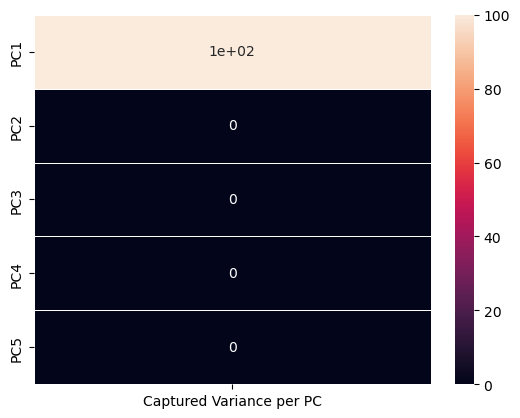

In [47]:

sns.heatmap(var_df, annot = True, linewidth = 0.5, fmt ='.1g')
plt.show()

If all the variance is in the 1st PC, it implies that the data points are highly aligned along a specific direction in the feature space. This situation can occur when there is a strong linear correlation among the original features, or when one feature dominates the variability of the data.

A few implications when all the variance is in the 1st PC:

Dimensionality reduction: Since the 1st PC captures most of the variance, you can potentially represent the data using only this single principal component without losing much information. Reducing the dimensionality can be beneficial for visualization or simplifying subsequent analyses.

Feature importance: The 1st PC represents the most important direction in the data space. By examining the loadings (coefficients) of the original features in the 1st PC, you can identify which features contribute the most to the overall variance.

Collinearity: If all the variance is in the 1st PC, it could be an indicator of multicollinearity among the original features, meaning that some features are redundant or highly correlated.

# Now conducting Multivariate Linear Regression 

In [49]:
x = solar_pca.drop(['kw_total'],axis=1).values
y = solar_pca['kw_total'].values

In [50]:
print(x)

[[  12.           34.26704025 -118.43271637   29.        ]
 [   4.           43.15636826  -77.60704041  112.        ]
 [   3.           42.27779388  -89.06658936   21.        ]
 ...
 [  18.           33.85254669 -118.25695801   35.        ]
 [  15.           34.11349106  -81.14066315   28.        ]
 [   0.           41.36030579  -73.73049927  102.        ]]


In [51]:
print(y)

[5.219000e+03 2.839125e+04 7.352250e+03 ... 2.153825e+04 2.601450e+04
 2.550000e+01]


# Split the dataset in the training set and test set

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state =0)

# Train the model on the training set

In [53]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

# Predict the test set results

In [54]:
y_pred = ml.predict(x_test)
print(y_pred)

[16629.8001082  13664.57197999 18382.95952592 ... 13557.85867517
 14635.84730823 18686.53741268]


# Here is the Prediction Model 

Regression model to predict the kw_total give user input of the following variables:
Type in your Latitude, Longitude, Number of Pannels you want to install, and number of Previously installed pannels. 

In [55]:
#-- Lets say I live on the 38th parralel Latitude, -89 degrees longitude, I want 600 pannels installed, and I have, 0
#-- Previously intalled pannels; What will my kw_total be?

ml.predict([[38,-89,600,0]])

array([48596.61179945])

# Evaluate the model

In [56]:
#-- Passing the testing data set with the target varaible and passing the 
# Passing the trained linear regression model to generate the r2 score --#

from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.09195541164301113

# Plot the results

Text(0.5, 1.0, 'Actual vs Predicted')

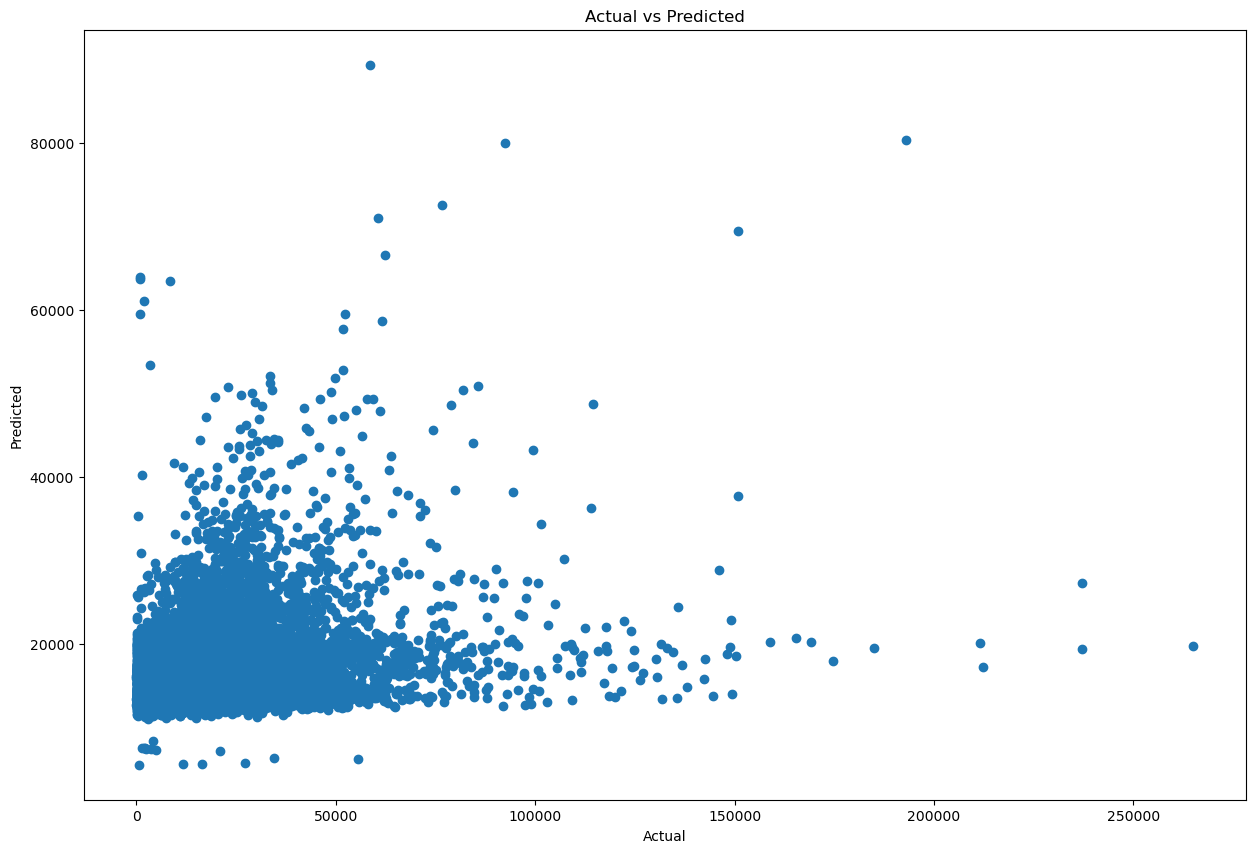

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Predicted Values

In [58]:
pred_y_df =pd.DataFrame({'Actual Value': y_test, 'Predicted value':y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,11178.00,16629.800108,-5451.800108
1,3110.00,13664.571980,-10554.571980
2,9697.00,18382.959526,-8685.959526
3,48516.25,18283.951837,30232.298163
4,8995.50,16963.831557,-7968.331557
5,4046.25,13426.764632,-9380.514632
6,10687.75,14923.436904,-4235.686904
7,35007.00,17152.482298,17854.517702
8,27733.50,22399.976990,5333.523010
9,7855.75,13428.528890,-5572.778890


# Linear Regression of single variables predicting total Kw Output

<AxesSubplot:xlabel='kw_total', ylabel='existing_installs_count'>

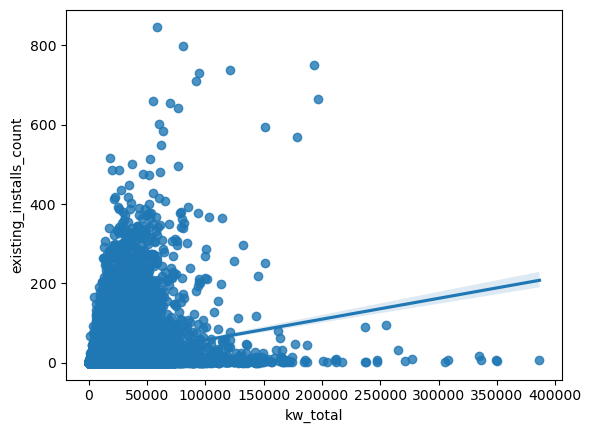

In [59]:
#-- Linear model of 'existing_installs_count' per rise / run of Killo-watts produced--#
# Scatter plot in seaborn, it automatically creates a trend line

sns.regplot(x='kw_total',y='existing_installs_count',data =solar_pca,scatter =True)

<AxesSubplot:xlabel='kw_total', ylabel='number_of_panels_median'>

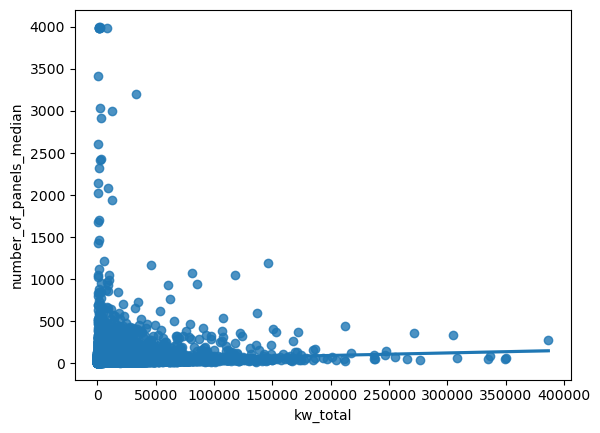

In [60]:
#-- Linear model of 'number_of_panels_median' per rise / run of Killo-watts produced --#
#-- There Apears to be no mappable linear pattern between the two plotted variables --#

sns.regplot(x='kw_total',y='number_of_panels_median',data =solar_pca,scatter =True)

# The Regression Lines slope generally south, towards the equator. 

<AxesSubplot:xlabel='kw_total', ylabel='lat_avg'>

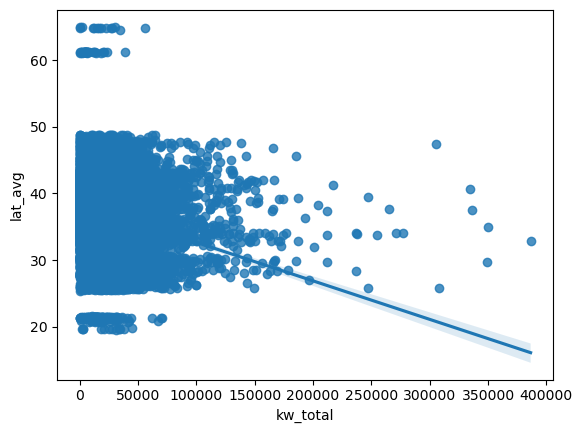

In [61]:
#-- Linear model of 'lat_avg' per rise / run of Killo-watts produced --#
#-- There Apears to be a slightly more mappable linear relation between the two plotted variables --#

sns.regplot(x='kw_total',y='lat_avg',data =solar_pca,scatter =True)

<AxesSubplot:xlabel='kw_total', ylabel='lng_avg'>

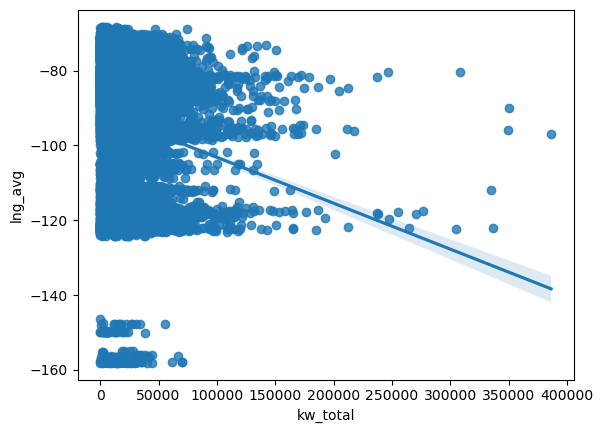

In [62]:
#-- Linear model of 'lng_avg' per rise / run of Killo-watts produced --#
#-- There Apears to be no mappable linear pattern between the two plotted variables --#

sns.regplot(x='kw_total',y='lng_avg',data =solar_pca,scatter =True)